  <div class="alert alert-info">
  Привет, Владимир! Меня зовут Светлана Чих и я буду проверять твой проект. Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе. Предлагаю общаться на «ты». Но если это не удобно - дай знать, и мы перейдем на «вы».

  <div class="alert alert-success">
  <b>👍 Успех:</b> Зелёным цветом отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах.
  </div>
  <div class="alert alert-warning">
  <b>🤔 Рекомендация:</b> Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
  </div>
  <div class="alert alert-danger">
  <b>😔 Необходимо исправить:</b> Красным цветом выделены комментарии, без исправления которых, я не смогу принять проект :(
  </div>
  <div class="alert alert-info">
  <b>👂 Совет:</b> Какие-то дополнительные материалы
  </div>
  Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
  Мне будет легче отследить изменения, если ты выделишь свои комментарии:
  <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
  Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта быстрее.
   </div>

# Задачи исследования

## Часть 1. Приоритезация гипотез

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

### Задача

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло


## Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.

### Проанализируйте A/B-тест:

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения]
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения
14. Примите решение по результатам теста и объясните его

>Варианты решений:
- Остановить тест, зафиксировать победу одной из групп
- Остановить тест, зафиксировать отсутствие различий между группами
- Продолжить тест

### Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats as st
import math
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})

<div class="alert alert-success">
<b>👍 Успех:</b> Импортированы нужные библиотеки!
</div>

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [4]:
# Ознакомимся с данными. Определяем функцию, которая сделает всё автоматически.
def explore_dataframe(df, name="DataFrame"):
    print(f"\n=== Анализ: {name} ===\n")
    
    print("📋 Информация о датафрейме:\n")
    print(df.info())
    
    print("\n🔍 Первые 5 строк:\n")
    print(df.head())
    
    print("\n🧼 Кол-во пропущенных значений в каждом столбце:\n")
    print(df.isna().sum())
    
    print("\n📎 Кол-во дубликатов:\n")
    print(df.duplicated().sum())

In [5]:
explore_dataframe(orders)


=== Анализ: DataFrame ===

📋 Информация о датафрейме:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

🔍 Первые 5 строк:

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B

🧼 Кол-во пропущенных значений в каждом столбце:

transactionId    0
visitorId        0
date             0
revenue          0

In [6]:
explore_dataframe(visitors)


=== Анализ: DataFrame ===

📋 Информация о датафрейме:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

🔍 Первые 5 строк:

         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756

🧼 Кол-во пропущенных значений в каждом столбце:

date        0
group       0
visitors    0
dtype: int64

📎 Кол-во дубликатов:

0


In [7]:
# Конвертируем даты в datetime 

orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

<div class="alert alert-success">
<b>👍 Успех:</b> Датасеты загружены и просмотрены! Изменены типы данных
</div>

### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета

In [8]:
# Применяем ICE
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [9]:
hypothesis.sort_values('ICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00


<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Для того, что бы полностью выводить гипотезы рекомендую использовать настройку pd.options.display.max_colwidth = 100, где 100 - количество символов. Кстати, pandas имеет много настроек - https://pandas.pydata.org/docs/user_guide/options.html. В сети есть публикации по этому поводу, например, https://towardsdatascience.com/8-commonly-used-pandas-display-options-you-should-know-a832365efa95. Лучше все же использовать дополнительные настройки тогда, когда в этом есть прямая необходимость, как в нашем проекте.
</div>

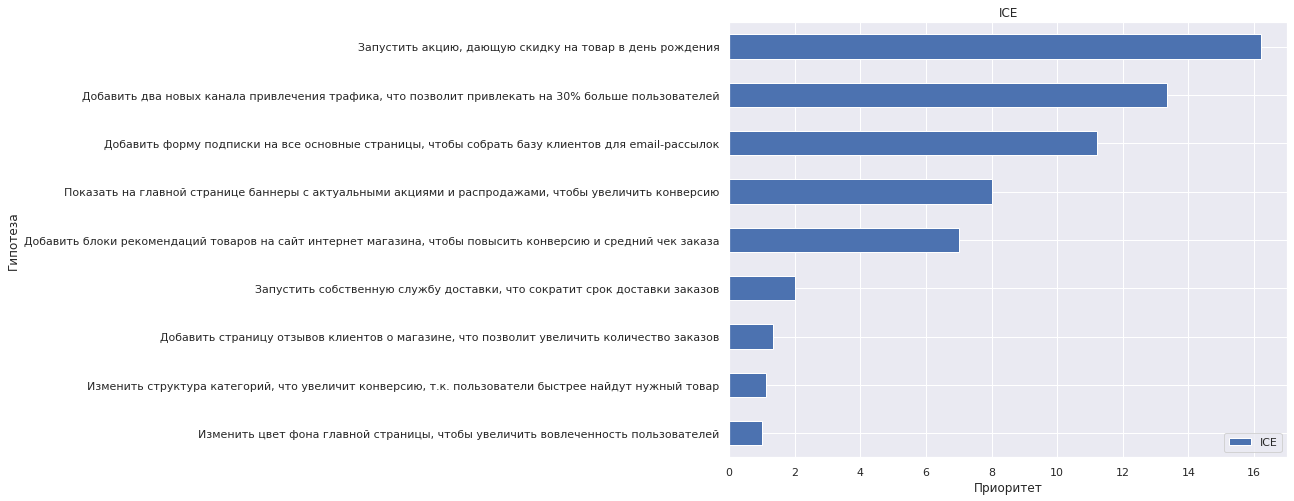

In [10]:
# Визуализируем 

ax = hypothesis[['Hypothesis', 'ICE']].set_index('Hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета

In [11]:
# Применяем

hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [12]:
# Изучаем 

hypothesis.sort_values('RICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.00
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.20


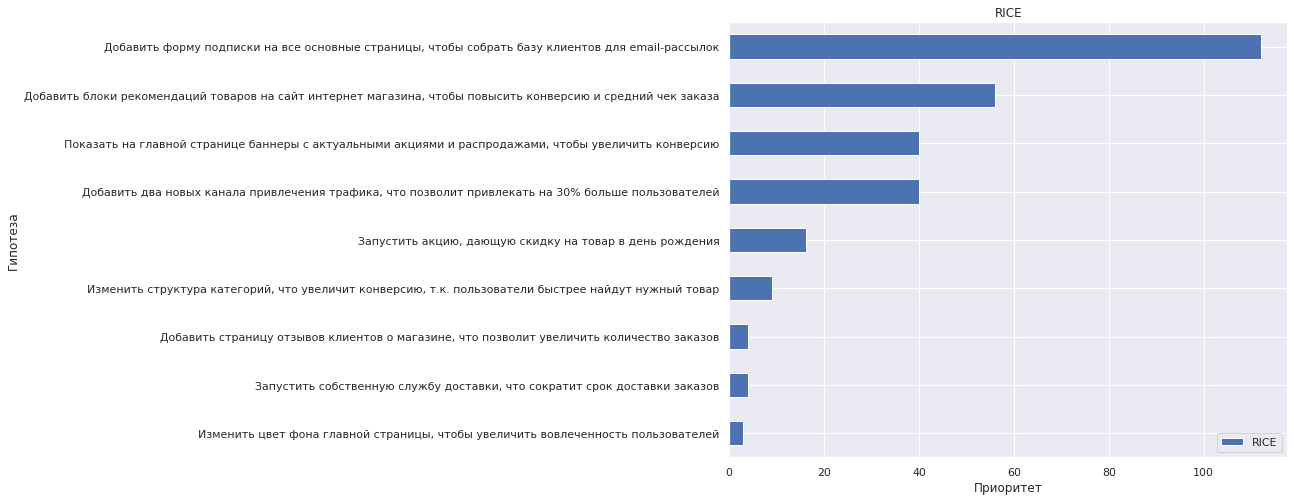

In [13]:
# Визуализируем

ax = hypothesis[['Hypothesis', 'RICE']].set_index('Hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло

 <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Здесь переписал вывод.</div>
При применении фреймворка RICE по сравнению с ICE приоритизация гипотез изменилась.  
Топ-3 гипотез по ICE:
1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика
3. Добавить форму подписки на все основные страницы

Топ-3 гипотез по RICE:
1. Добавить форму подписки на все основные страницы
2. Изменить категорию товаров, в которой чаще всего пропадают товары
3. Добавить блоки рекомендаций товаров на сайт

Это произошло потому, что фреймворк RICE учитывает параметр Reach — охват. Гипотезы, которые затрагивают большее количество пользователей, получили более высокий приоритет.  
Гипотеза о форме подписки оказалась выше в RICE, потому что она влияет на всех пользователей, а не только на ограниченную аудиторию.

<div class="alert alert-success">
<b>👍 Успех:</b> Отлично получилось!
</div>

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Здесь нужно описать как поменялась приоритизация, какие гипотезы остались в топе, а какие нет</s>
</div>

# Часть 2. Анализ A/B-теста

In [14]:
# Для наглядности, выведем первые 5 строк
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [15]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
# Переименуем колонки для удобства
orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace=True)

In [17]:
# Группировка заказов по дате и группе
# Считаем уникальные заказы (transaction_id), уникальных покупателей (visitor_id) и суммарную выручку
# Затем переименовываем столбцы для удобства

orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transaction_id':'nunique','visitor_id':'nunique','revenue':'sum'})
                        .rename(columns={'transaction_id':'orders','visitor_id':'buyers'}))

# Создаем копию группы для последующей группировки
orders_grouped['group_copy'] = orders_grouped['group']

# Устанавливаем мультииндекс для сортировки и кумулятивных расчётов
orders_grouped = orders_grouped.set_index(['date','group'])

# Сортируем по дате и группе, затем считаем кумулятивные суммы метрик по каждой группе
orders_cumsum = (orders_grouped
                 .sort_values(['date','group'])
                 .groupby('group_copy')
                 .cumsum()
                 .reset_index())

In [18]:
# посчитаем сумму визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
# скопируем group чтобы провести по ней кумулятивную сумму
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()    

In [19]:
# Объединяем
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])

In [20]:
# Рассчитаем конверсию и средний чек
cummulative['average_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']

In [21]:
cummulative.head()

,date,group,orders,buyers,revenue,visitors,average_check,conversion
0,2019-08-01,A,24,20,148579,719,"6,190.79",0.03
1,2019-08-01,B,21,20,101217,713,"4,819.86",0.03
2,2019-08-02,A,44,39,242401,1338,"5,509.11",0.03
3,2019-08-02,B,45,43,266748,1294,"5,927.73",0.03
4,2019-08-03,A,68,63,354874,1845,"5,218.74",0.04


### 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения

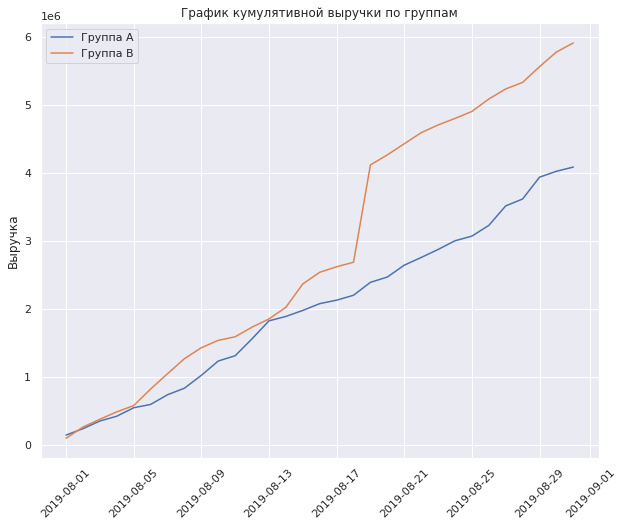

In [22]:
# Визуализируем
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'revenue']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'revenue']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='Группа A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='Группа B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

У "B" резкий рост, похожий на выброс. "А" растет линейно.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения

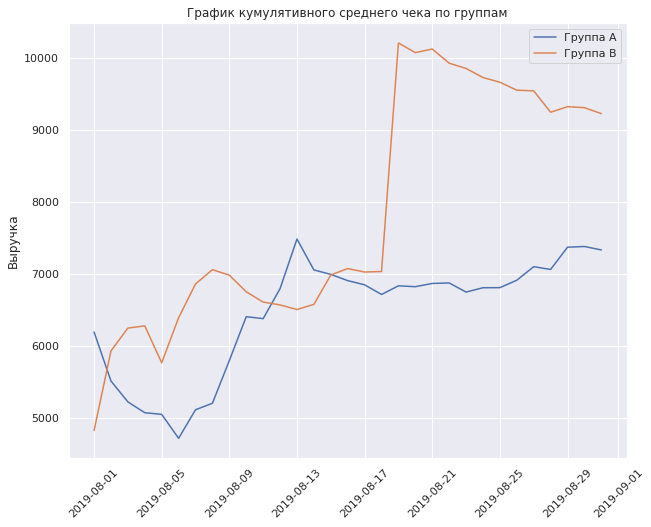

In [23]:
# Визуализируем
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'average_check']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'average_check']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='Группа A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='Группа B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Тоже самое с "B", сначала показывает резкий рост, затем делает отскок. Оба графика демонстрируют похожее поведение

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Группа В нестабильна. Возможно, в данную группу в середине теста попали крупные заказы. Необходимо будет учесть этот факт при принятии решения о результатах A/B-теста
</div>

### 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения

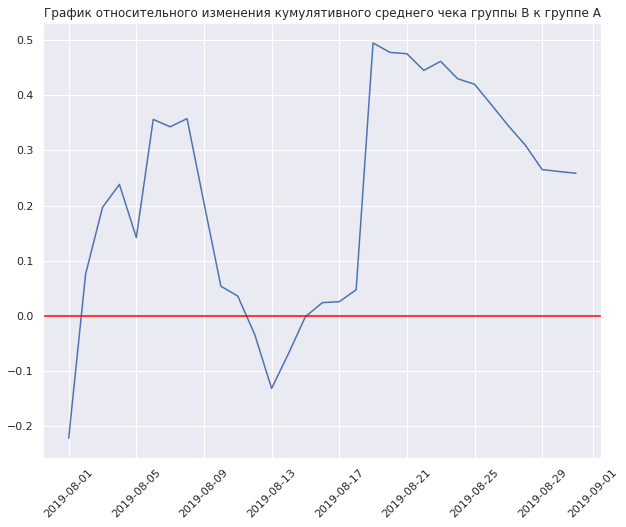

In [24]:
# Визуализируем
temp = (cummulativeA[['date', 'average_check']].merge(cummulativeB[['date', 'average_check']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(temp['date'], temp['average_check_B'] / temp['average_check_A']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45)
plt.show()

Стоит отметить, что все три графика демонстрируют одну картину. Резкий скачек и спад. Это может говорить о выбросах

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### 4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения

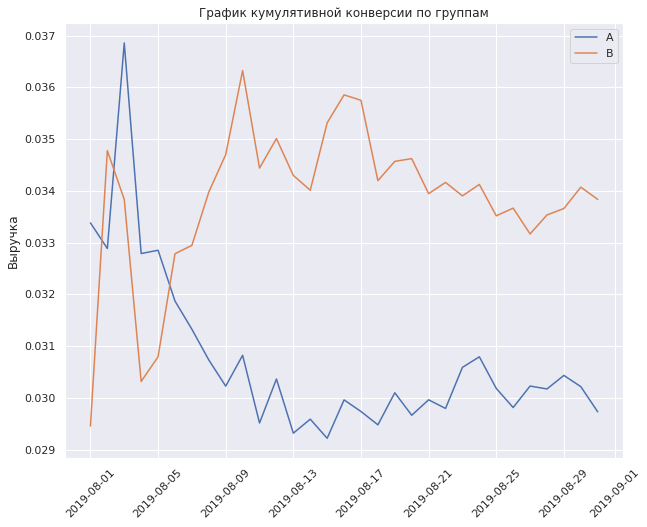

In [25]:
# Визуалилзируем
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'conversion']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'conversion']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

После пика у обоих групп "А"-конверсия находится в районе 0,029 и до 0,031. "В"-конверсия от 0,037 и до 0,033. Конверсия у "B"пока выглядит лучше.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### 5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения

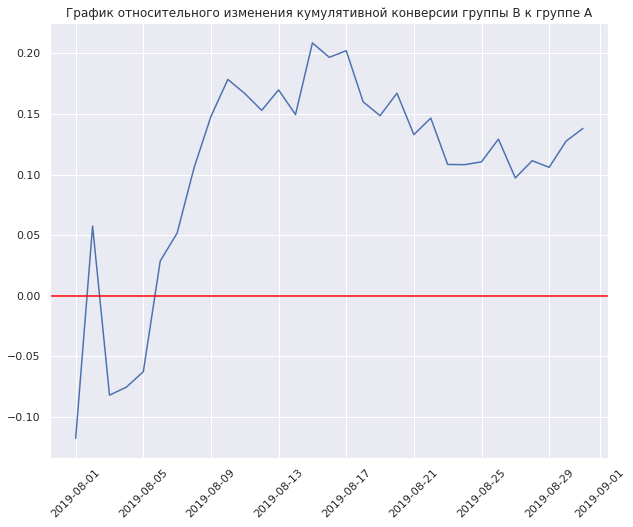

In [26]:
# Визуализируем
temp = (cummulativeA[['date', 'conversion']].merge(cummulativeB[['date', 'conversion']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(temp['date'], temp['conversion_B'] / temp['conversion_A']-1)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45)
plt.show()

B-конверсия прилично лучше, но количество дней теста небольшое.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения

In [27]:
# Группируем закази по пользователям
orders_per_user = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})\
                         .rename(columns={'transaction_id':'orders'})

In [28]:
# Проверяем
orders_per_user.head()

,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


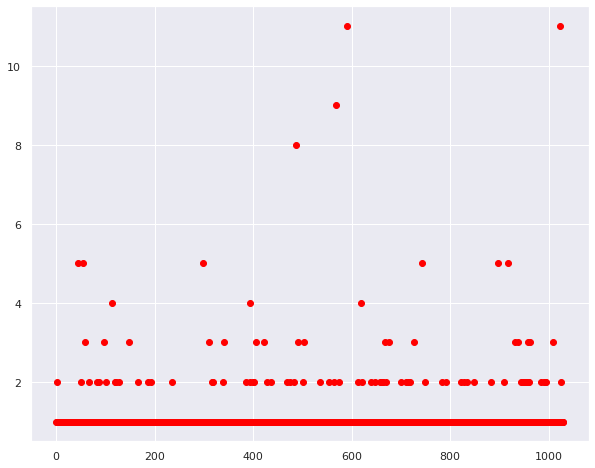

In [29]:
# Визуализируем
x_values = pd.Series(range(0,len(orders_per_user['orders'])))
plt.scatter(x_values, orders_per_user['orders'], color='red')
plt.show()

В основном покупку совершают 1 раз, но также встречаются клиенты, которые совершают гораздо больше покупок, в то время как заказы более более 5 раз выглядят как выбросы.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей

In [30]:
# Считаем перцентили 

print('90 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [99])))

90 перцентиль: 1.00
95 перцентиль: 2.00
99 перцентиль: 4.00


In [31]:
orders_per_user['orders'].max()

11

In [32]:
np.ptp(orders_per_user['orders'], axis=0)

10

Все, что за 99 перцентилем — аномально.

In [33]:
outlaws_1p = orders_per_user[orders_per_user['orders'] >= 4]['visitor_id'].to_list()

 <div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения

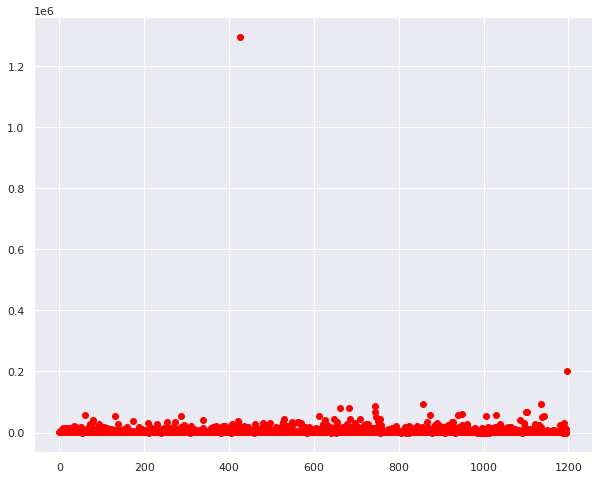

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='red')
plt.show()

Видны 2 отчетливых выброса, которые и вызывали искажения на графиках выше

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Здесь нужно построить еще один график, без дорогих заказов, что бы подробно рассмотреть основную массу заказов</s>
</div>

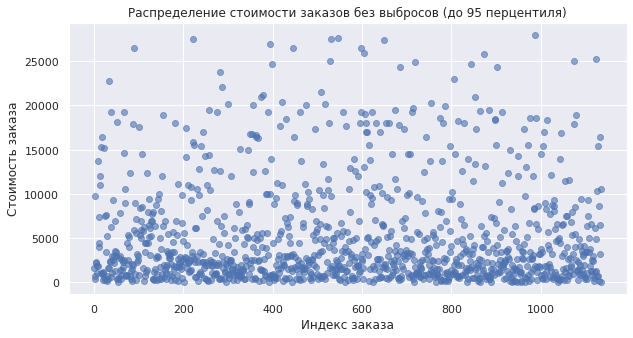

In [35]:
# Удалим дорогие заказы по 95-му перцентилю
revenue_threshold = np.percentile(orders['revenue'], 95)
filtered_orders = orders[orders['revenue'] <= revenue_threshold]

# Строим график для основной массы заказов
x_values_filtered = pd.Series(range(0, len(filtered_orders)))
plt.figure(figsize=(10, 5))
plt.scatter(x_values_filtered, filtered_orders['revenue'], alpha=0.6)
plt.title('Распределение стоимости заказов без выбросов (до 95 перцентиля)')
plt.xlabel('Индекс заказа')
plt.ylabel('Стоимость заказа')
plt.grid(True)

plt.show()

 <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> График построен.</div>
На этом графике отображены только заказы с выручкой ниже 95-го перцентиля. Это позволило исключить аномально дорогие заказы и лучше рассмотреть основную массу данных. Как можно видеть - основная масса заказов находится в районе до 15 000, остальные реже.

<div class="alert alert-success">
<b>👍 Успех:</b> Теперь все заказы хорошо видно!
</div>

### 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов

In [36]:
# Считаем перцентили
print('90 перцентиль: %.2f' % (np.percentile(orders['revenue'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

90 перцентиль: 18168.00
95 перцентиль: 28000.00
99 перцентиль: 58233.20


In [37]:
orders['revenue'].max()

1294500

In [38]:
np.ptp(orders['revenue'], axis=0)

1294450

Все, что за 99 перцентилем — аномально.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### 10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения

In [39]:
conversion = (orders.groupby('group').agg({'transaction_id':'count'}).rename(columns={'transaction_id':'orders'}))\
                                     .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion['conversion'] = conversion['orders'] / conversion['visitors']

In [40]:
display(conversion)

,group,orders,visitors,conversion
0,A,557,18736,0.03
1,B,640,18916,0.03


In [41]:
# Воспользуемся Z-критерием для разности двух долей.
# H0: Конверсия в группе A РАВНА конверсии в группе B
# H1: Конверсия в группе A НЕ РАВНА конверсии в группе B

alpha=0.05
purchases = np.array(conversion['orders'])
leads = np.array(conversion['visitors'])

p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]

combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2

z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.02320723394441848
Отвергаем нулевую гипотезу


In [42]:
# Переведём в промилле для наглядности
conversion['conversion_promille'] = conversion['conversion'] * 1000
conversion

,group,orders,visitors,conversion,conversion_promille
0,A,557,18736,0.03,29.73
1,B,640,18916,0.03,33.83


Конверсия B - больше, статистическая значимость есть.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения

In [43]:
# Воспользуемся критерием Манна-Уитни
# H0: Средний чек A НЕ ПРЕВОСХОДИТ среднему чеку группы B
# H1: Средний чек A ПРЕВОСХОДИТ среднему чеку группы B

alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  0.7292909855432458
Не получилось отвергнуть H0: вывод о различии сделать нельзя


In [44]:
# Средний чек для группы А
orders[orders['group']=='A']['revenue'].mean()

7333.578096947936

In [45]:
# Средний чек для группы B
orders[orders['group']=='B']['revenue'].mean()

9230.875

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### 12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения

In [46]:
# Отчистим данные
orders_temp = orders[~orders['visitor_id'].isin(outlaws_1p)]
conversion_clear = (orders_temp.groupby('group').agg({'transaction_id':'count'}).rename(columns={'transaction_id':'orders'}))\
                                                .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()

In [47]:
# Воспользуемся Z-критерием для разности двух долей.
# H0: Конверсия в группе A РАВНА конверсии в группе B
# H1: Конверсия в группе A НЕ РАВНА конверсии в группе B

alpha=0.05
purchases = np.array(conversion_clear['orders'])
leads = np.array(conversion_clear['visitors'])

p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2

z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.019821291468021807
Отвергаем нулевую гипотезу


B-конверсия снова превышает конверсию группы А со статистической значимостью.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения

In [48]:
orders_clear = orders.query('revenue <= 58233')

In [49]:
# Воспользуемся критерием Манна-Уитни
# H0: Средний чек A НЕ ПРЕВОСХОДИТ средний чек у группы B
# H1: Средний чек A ПРЕВОСХОДИТ средний чек у группы B

alpha = 0.05
results = st.mannwhitneyu(orders_clear[orders_clear['group']=='A']['revenue'], orders_clear[orders_clear['group']=='B']['revenue'])
pvalue = results.pvalue

print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  0.6208626966847455
Не получилось отвергнуть H0: вывод о различии сделать нельзя


In [50]:
# Средний чек A после очистки
orders_clear[orders_clear['group']=='A']['revenue'].mean()

6470.587272727273

In [51]:
# Средний чек B после очистки
orders_clear[orders_clear['group']=='B']['revenue'].mean()

6592.692913385827

Вывод остался прежним, хотя средний чек значительно изменился.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### 14. Примите решение по результатам теста и объясните его

В рамках проекта были выполнены две ключевые задачи:

### 1. Приоритизация гипотез
- Использованы два фреймворка — ICE и RICE.
- При использовании ICE топ-гипотезами стали: «акция на день рождения», «новые каналы трафика», «форма подписки».
- При использовании RICE приоритет сместился к гипотезам с наибольшим охватом, и на первое место вышла форма подписки, что логично, так как RICE учитывает дополнительный параметр Reach.

### 2. Анализ A/B-теста
- Построены графики кумулятивной выручки, среднего чека, конверсии и их относительных изменений.
- Обнаружены значительные выбросы — дорогие заказы, которые искажали результаты. Были построены дополнительные графики без выбросов.
- Проанализированы выбросы и аномальные пользователи на основе 95-го и 99-го перцентилей.
- По результатам теста группа B показывает лучшие метрики, но результат пока нельзя признать однозначным. Требуется больше наблюдений для стабилизация показателей.

### Общий вывод
- Тест стоит продолжать, чтобы получить более стабильные и надежные данные.
- Рекомендуется рассмотреть гипотезы с высоким охватом в первую очередь - форму подписки.


 <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Вывод переработан.</div>

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Итоговый вывод должен быть более подробным и охватывать всю работу</s>
</div>

<div class="alert alert-success">
<b>👍 Успех:</b> Хорошая работа, молодец! Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.

**Дополнительные материалы:**

[Вебинары под эгидой Практикума](https://vk.com/yandex.praktikum?w=wall-176471180_2144),

[Лекции Анатолия Карпова 1](https://www.youtube.com/watch?v=jnFVmtaeSA0&list=WL&index=19&t=2s) [2](https://www.youtube.com/watch?v=gljfGAkgX_o&list=WL&index=4)

Материалы [gopractice](https://gopractice.ru/summary/)

Лекцию Карта статистических методов [Смотреть видео](https://www.youtube.com/watch?v=-zps6hm0nX8&t=1269s)
</div>